# NGS HW1

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from collections import Counter
from Bio import SeqIO

In [15]:
real1 = "data/frag.R1.fastq"
real2 = "data/frag.R2.fastq"
test = "data/test.fastq"

In [16]:
def gc_content(record, min_quality=0):
    """Count gc precent of the record(read)"""
    seq_qual = zip(record.seq, record.letter_annotations["phred_quality"])
    seq = [nucl for nucl, qual in seq_qual if nucl != 'N' and qual > min_quality]
    c = Counter(seq)
    return (c['G'] + c['C']) / len(seq)    

In [23]:
def gc_content_gen(path, min_quality=40, read_min_quality=40):
    """Generator which yeilds rounded gc content"""
    for record in SeqIO.parse(path, "fastq"):
        if sum(record.letter_annotations["phred_quality"]) / len(record) > read_min_quality:
            res = round(gc_content(record, min_quality=min_quality), 2)
            yield res

In [24]:
def plot_gc_content(gc_list):
    c = Counter(gc_list)
    X = np.arange(101) / 100
    Y = [c[x] for x in X]
    fig, ax = plt.subplots()
    ax.plot(X, Y)

    ax.set(xlabel='%GC', ylabel='Number of reads',
           title='GC Content')
    ax.grid()
    plt.show()
    

## Plots of GC content for frag.R1.fastq

## Set threshold for nucleotide quality and mean read quality

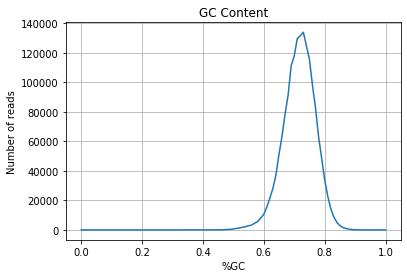

In [26]:
gc1 = gc_content_gen(real1, min_quality=35, read_min_quality=45)
plot_gc_content(gc1)

## and frag.R2.fastq

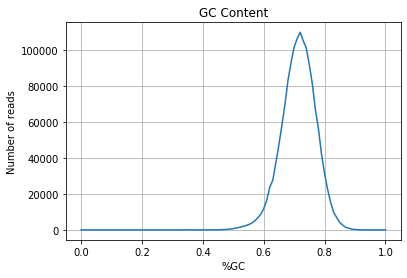

In [90]:
gc2 = gc_content_gen(real2, min_quality=35, read_min_quality=45)
plot_gc_content(gc2)

## Plot bases quality

In [3]:
def plot_quality(path):
    quality = np.zeros(100)
    total = 0
    for record in SeqIO.parse(path, "fastq"):
        total += 1
        quality += np.array(record.letter_annotations["phred_quality"][:100])
    quality = quality / total - 33
    X = np.arange(100)
    Y = [quality[x] for x in X]
    fig, ax = plt.subplots()
    ax.plot(X, Y)

    ax.set(xlabel='Nucliotide position', ylabel='Mean quality',
           title='Quality')
    ax.grid()
    plt.show()


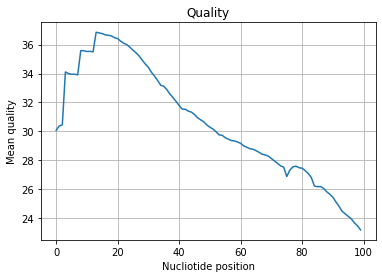

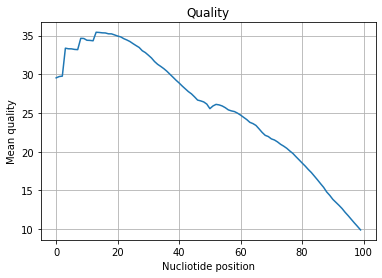

In [4]:
for dataset in (real1, real2):
    plot_quality(dataset)

## Probability of error

In [34]:
def error_prob(path):
    quality = np.zeros(100)
    total = 0
    for record in SeqIO.parse(path, "fastq"):
        total += 1
        quality += np.array(record.letter_annotations["phred_quality"][:100])
    quality = quality / total - 33
    return quality

def plot_err(quality):
    X = np.arange(100)
    Y = 10 ** (-quality/10)
    sns.scatterplot(X, Y)

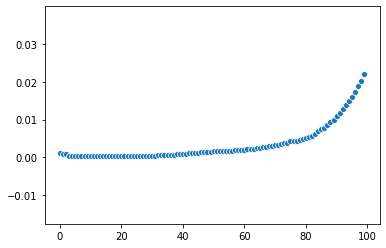

In [35]:
qual = error_prob(real1) + error_prob(real2)
plot_err(qual / 2)

## Compare to fastqc results 

In [81]:
!fastqc -o output/ data/frag.R1.fastq

Started analysis of frag.R1.fastq
Approx 5% complete for frag.R1.fastq
Approx 10% complete for frag.R1.fastq
Approx 15% complete for frag.R1.fastq
Approx 20% complete for frag.R1.fastq
Approx 25% complete for frag.R1.fastq
Approx 30% complete for frag.R1.fastq
Approx 35% complete for frag.R1.fastq
Approx 40% complete for frag.R1.fastq
Approx 45% complete for frag.R1.fastq
Approx 50% complete for frag.R1.fastq
Approx 55% complete for frag.R1.fastq
Approx 60% complete for frag.R1.fastq
Approx 65% complete for frag.R1.fastq
Approx 70% complete for frag.R1.fastq
Approx 75% complete for frag.R1.fastq
Approx 80% complete for frag.R1.fastq
Approx 85% complete for frag.R1.fastq
Approx 90% complete for frag.R1.fastq
Approx 95% complete for frag.R1.fastq
Analysis complete for frag.R1.fastq


<img src="images/R1_fastq/per_sequence_gc_content.png">
<img src="images/R1_fastq/per_base_quality.png">

In [93]:
!fastqc -o output/ data/frag.R2.fastq

Started analysis of frag.R2.fastq
Approx 5% complete for frag.R2.fastq
Approx 10% complete for frag.R2.fastq
Approx 15% complete for frag.R2.fastq
Approx 20% complete for frag.R2.fastq
Approx 25% complete for frag.R2.fastq
Approx 30% complete for frag.R2.fastq
Approx 35% complete for frag.R2.fastq
Approx 40% complete for frag.R2.fastq
Approx 45% complete for frag.R2.fastq
Approx 50% complete for frag.R2.fastq
Approx 55% complete for frag.R2.fastq
Approx 60% complete for frag.R2.fastq
Approx 65% complete for frag.R2.fastq
Approx 70% complete for frag.R2.fastq
Approx 75% complete for frag.R2.fastq
Approx 80% complete for frag.R2.fastq
Approx 85% complete for frag.R2.fastq
Approx 90% complete for frag.R2.fastq
Approx 95% complete for frag.R2.fastq
Analysis complete for frag.R2.fastq


<img src="images/R2_fastq/per_sequence_gc_content.png">
<img src="images/R2_fastq/per_base_quality.png">